# Setup and General Data Overview

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!nvidia-smi

Thu Jun 17 03:53:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
virtual_memory().total / 1e9

27.339640832

In [ ]:
# raw_data = pd.read_csv('data/liked_labeled.csv')
!wget https://raw.githubusercontent.com/nullmaxwell/learnify/main/data/liked_labeled.csv?token=AEUF43N6NXRRL46V2M7FY6TAZLCLE

--2021-06-17 03:55:51--  https://raw.githubusercontent.com/nullmaxwell/learnify/main/data/liked_labeled.csv?token=AEUF43N6NXRRL46V2M7FY6TAZLCLE
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-06-17 03:55:51 ERROR 404: Not Found.



In [ ]:
raw_data = pd.read_csv('liked_labeled.csv')

In [ ]:
labeled_songs = raw_data.copy()
labeled_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4296 non-null   int64  
 1   Track URI             4296 non-null   object 
 2   Track Name            4296 non-null   object 
 3   Artist URI(s)         4296 non-null   object 
 4   Artist Name(s)        4296 non-null   object 
 5   Album URI             4296 non-null   object 
 6   Album Name            4296 non-null   object 
 7   Album Artist URI(s)   4296 non-null   object 
 8   Album Artist Name(s)  4296 non-null   object 
 9   Album Release Date    4296 non-null   object 
 10  Album Image URL       4296 non-null   object 
 11  Disc Number           4296 non-null   int64  
 12  Track Number          4296 non-null   int64  
 13  Track Duration (ms)   4296 non-null   int64  
 14  Track Preview URL     3247 non-null   object 
 15  Explicit             

In [ ]:
labeled_songs.describe()

,Unnamed: 0,Disc Number,Track Number,Track Duration (ms),Popularity,Added By,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,4296.000000,4296.000000,4296.000000,4.296000e+03,4296.000000,0.0,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000
mean,2147.500000,1.032588,6.540503,2.423103e+05,31.929004,NaN,0.563541,0.533308,5.220825,-10.394896,0.612625,0.103522,0.374874,0.323438,0.192953,0.387757,117.886939,3.894712
std,1240.292707,0.321318,6.242312,2.894246e+05,23.515855,NaN,0.185046,0.247769,3.635817,6.086908,0.487207,0.122246,0.344682,0.383817,0.163539,0.249579,30.341885,0.472055
min,0.000000,1.000000,1.000000,4.800000e+03,0.000000,NaN,0.000000,0.000098,0.000000,-46.829000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1073.750000,1.000000,2.000000,1.648762e+05,7.000000,NaN,0.453000,0.360000,2.000000,-12.582000,0.000000,0.037200,0.047200,0.000082,0.098500,0.175000,93.919000,4.000000
50%,2147.500000,1.000000,5.000000,2.148260e+05,34.000000,NaN,0.584000,0.550000,5.000000,-8.774000,1.000000,0.050900,0.274000,0.047200,0.121000,0.363000,117.964000,4.000000
75%,3221.250000,1.000000,9.000000,2.657785e+05,51.000000,NaN,0.694000,0.729000,8.000000,-6.421000,1.000000,0.105000,0.703000,0.781000,0.229000,0.573000,137.941000,4.000000
max,4295.000000,11.000000,42.000000,9.146416e+06,96.000000,NaN,0.980000,0.993000,11.000000,-0.394000,1.000000,0.928000,0.996000,0.991000,0.985000,0.982000,214.131000,5.000000


# Some basic analysis of liked songs

Note: The label in the last column constitutes a song that I like.

In [ ]:
analysis_data = labeled_songs.copy()
analysis_data = analysis_data.loc[analysis_data['Label'] == True]
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 3 to 4293
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2092 non-null   int64  
 1   Track URI             2092 non-null   object 
 2   Track Name            2092 non-null   object 
 3   Artist URI(s)         2092 non-null   object 
 4   Artist Name(s)        2092 non-null   object 
 5   Album URI             2092 non-null   object 
 6   Album Name            2092 non-null   object 
 7   Album Artist URI(s)   2092 non-null   object 
 8   Album Artist Name(s)  2092 non-null   object 
 9   Album Release Date    2092 non-null   object 
 10  Album Image URL       2092 non-null   object 
 11  Disc Number           2092 non-null   int64  
 12  Track Number          2092 non-null   int64  
 13  Track Duration (ms)   2092 non-null   int64  
 14  Track Preview URL     1627 non-null   object 
 15  Explicit             

In [ ]:
from collections import defaultdict
artists = defaultdict(int)
for i,song in analysis_data.iterrows():
	for musician in song['Artist Name(s)'].split(','):
		artists[musician] += 1

artists = pd.DataFrame(artists.items(), columns=['Artist', 'Track Count']).sort_values('Track Count', ascending=False).reset_index(drop=True)

print("Number of unique artists: " + str(len(analysis_data['Artist Name(s)'].unique())))

Number of unique artists: 936


Text(0.5, 1.0, 'Top 50 Artists by Number of Songs')

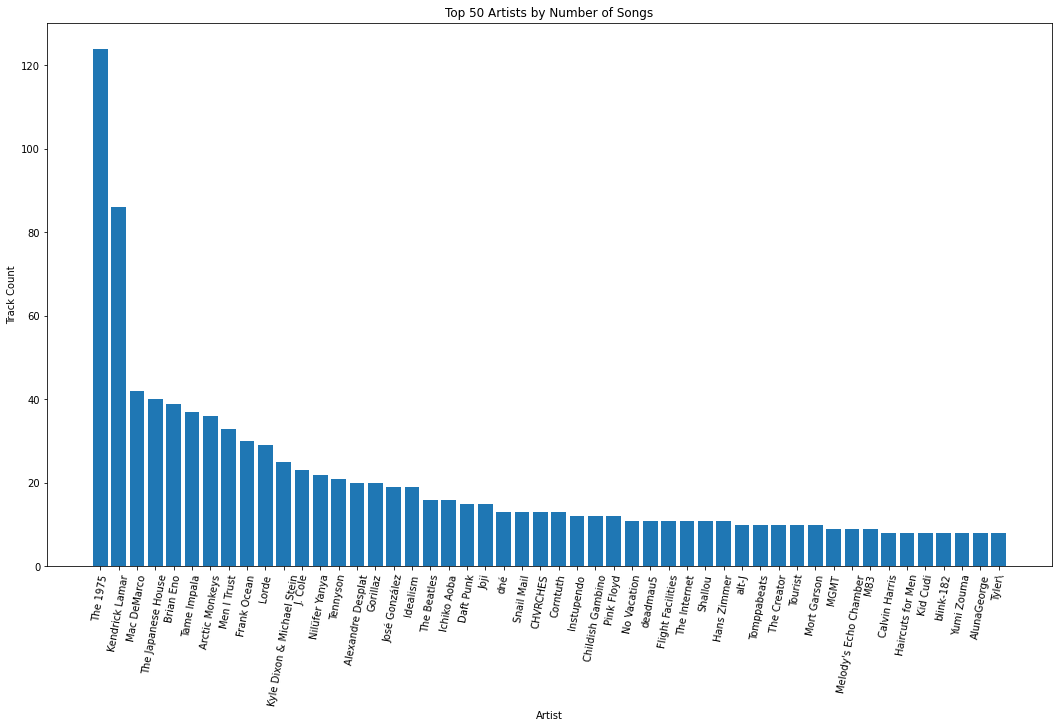

In [ ]:
plt.figure(figsize=(18, 10))
plt.bar(artists['Artist'][:50], artists['Track Count'][:50])
plt.xticks(rotation=80)
plt.xlabel(artists.columns[0])
plt.ylabel(artists.columns[1])
plt.title('Top 50 Artists by Number of Songs')

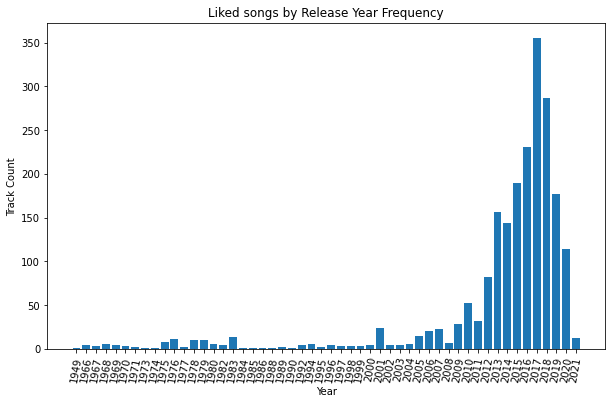

In [ ]:
years = defaultdict(int)
for i,song in analysis_data.iterrows():
    years[song['Album Release Date'][:4]] += 1

years = pd.DataFrame(years.items(), columns=['Year', 'Track Count']).sort_values('Year')

plt.figure(figsize=(10, 6))
plt.bar(years['Year'], years['Track Count'])
plt.xticks(rotation=80)
plt.xlabel(years.columns[0])
plt.ylabel(years.columns[1])
plt.title('Liked songs by Release Year Frequency');

/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


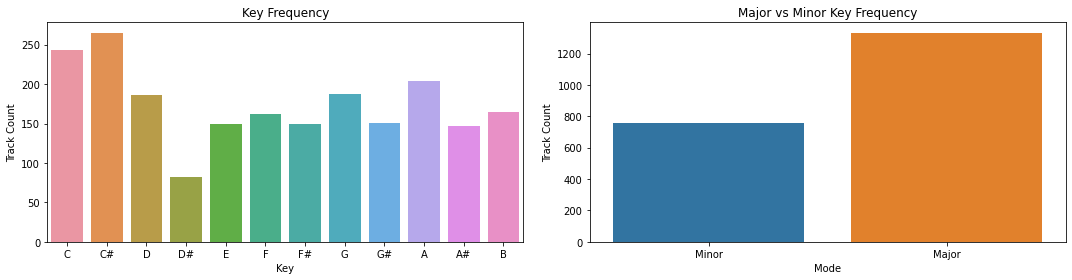

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,4))

plt.subplot(1, 2, 1)
axes = sns.countplot(analysis_data['Key'])
axes.set(xticklabels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Track Count')
plt.title('Key Frequency')

plt.subplot(1, 2, 2)
axes = sns.countplot(analysis_data['Mode'])
axes.set(xticklabels=['Minor', 'Major'])
plt.ylabel('Track Count')
plt.title('Major vs Minor Key Frequency');

plt.tight_layout(w_pad=2)

# Data Cleaning

In [ ]:
processing_data = raw_data.copy()

# Features we are going to be training on
features = ['Explicit', 
            'Popularity', 
            'Danceability', 
            'Energy', 
            'Key', 
            'Loudness', 
            'Mode', 
            'Speechiness', 
            'Acousticness', 
            'Instrumentalness', 
            'Liveness', 
            'Valence', 
            'Tempo', 
            'Time Signature',
            'Label']
labels = ['Label']

processing_data = processing_data[features]

In [ ]:
processing_data['Key'] = processing_data['Key'].astype("category")
processing_data['Explicit'] = processing_data['Explicit'].astype("category")
processing_data['Mode'] = processing_data['Mode'].astype("category")

In [ ]:
processing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296 entries, 0 to 4295
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Explicit          4296 non-null   category
 1   Popularity        4296 non-null   int64   
 2   Danceability      4293 non-null   float64 
 3   Energy            4293 non-null   float64 
 4   Key               4293 non-null   category
 5   Loudness          4293 non-null   float64 
 6   Mode              4293 non-null   category
 7   Speechiness       4293 non-null   float64 
 8   Acousticness      4293 non-null   float64 
 9   Instrumentalness  4293 non-null   float64 
 10  Liveness          4293 non-null   float64 
 11  Valence           4293 non-null   float64 
 12  Tempo             4293 non-null   float64 
 13  Time Signature    4293 non-null   float64 
 14  Label             4296 non-null   bool    
dtypes: bool(1), category(3), float64(10), int64(1)
memory usage: 386.7 KB


In [ ]:
processing_data['Explicit'].value_counts()

False    3567
True      729
Name: Explicit, dtype: int64

In [ ]:
processing_data['Key'].value_counts()

1.0     530
0.0     495
7.0     417
9.0     407
2.0     405
11.0    352
5.0     329
8.0     309
10.0    306
6.0     305
4.0     298
3.0     140
Name: Key, dtype: int64

In [ ]:
processing_data['Mode'].value_counts()

1.0    2630
0.0    1663
Name: Mode, dtype: int64

In [ ]:
# Checking for imbalance in the dataset
processing_data['Label'].value_counts(True)

False    0.513035
True     0.486965
Name: Label, dtype: float64

In [ ]:
for col in processing_data.columns:
    print(col, ":", processing_data[col].isnull().sum())

Explicit : 0
Popularity : 0
Danceability : 3
Energy : 3
Key : 3
Loudness : 3
Mode : 3
Speechiness : 3
Acousticness : 3
Instrumentalness : 3
Liveness : 3
Valence : 3
Tempo : 3
Time Signature : 3
Label : 0


In [ ]:
processing_data[processing_data['Danceability'].isna()]

,Explicit,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
491,False,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
703,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2067,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
# Drop rows that contain any null values
processing_data.dropna(inplace = True)

In [ ]:
# Ensuring all features were fixed
for col in processing_data.columns:
    print(col, ":", processing_data[col].isnull().sum())

Explicit : 0
Popularity : 0
Danceability : 0
Energy : 0
Key : 0
Loudness : 0
Mode : 0
Speechiness : 0
Acousticness : 0
Instrumentalness : 0
Liveness : 0
Valence : 0
Tempo : 0
Time Signature : 0
Label : 0


In [ ]:
# Replacing any NaN values with median
for col in processing_data.columns:
    if processing_data[col].isnull().sum() > 0 == True and processing_data[col].dtypes not in ['bool', 'category'] == True:
        processing_data[col] = processing_data[col].fillna(processing_data[col].median())

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

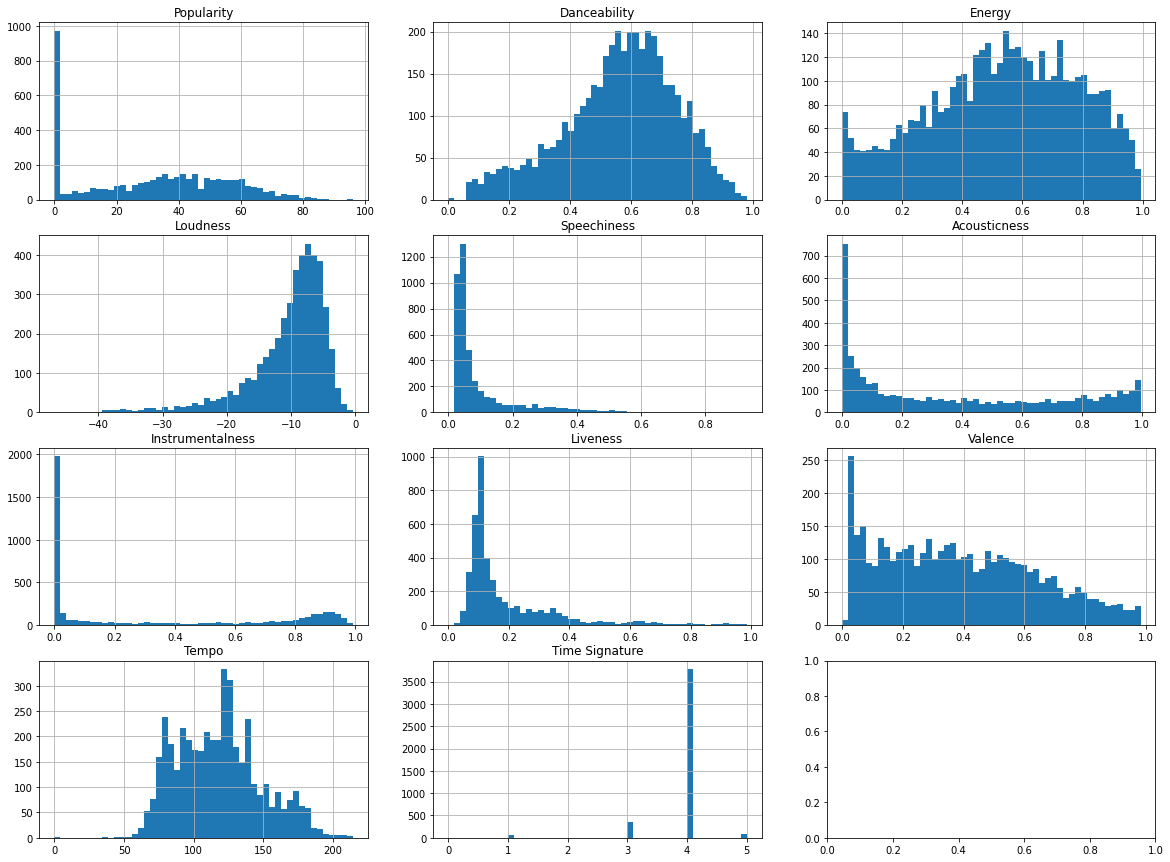

In [ ]:
# Overview of whole data set
import matplotlib.pyplot as plt

processing_data.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
cmatrix = processing_data.corr()
cmatrix["Label"].sort_values(ascending = False)

Label               1.000000
Popularity          0.188560
Loudness            0.024206
Tempo               0.024164
Danceability        0.024129
Time Signature      0.023851
Energy              0.014470
Acousticness       -0.008568
Valence            -0.013575
Liveness           -0.044454
Instrumentalness   -0.076210
Speechiness        -0.095719
Name: Label, dtype: float64

# Decision Tree Classification Approach

In [ ]:
from sklearn.model_selection import train_test_split

ds_features = processing_data[features[:-1]]
ds_labels = processing_data['Label']

train_X, validation_X, train_Y, validation_Y  = train_test_split(ds_features, 
                                                                 ds_labels,
                                                                 test_size = 0.20, 
                                                                 random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth = 5)
dt_model.fit(train_X, train_Y)

dt_model.score(validation_X, validation_Y)*100

59.25494761350407

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth = 5, n_estimators = 100)
rf_model.fit(train_X, train_Y)

rf_model.score(validation_X, validation_Y) * 100

62.9802095459837

# Neural Network Data Grooming
In order to this we must tranform the labels into their 0 and 1 counterparts to fit the Binary classification specifications.

In [ ]:
nn_train_X = train_X.copy()
nn_validation_X = validation_X.copy()

nn_train_Y = train_Y.copy()
nn_train_Y[nn_train_Y[:] == True] = 1.0

nn_validation_Y = validation_Y.copy()
nn_validation_Y[nn_validation_Y[:] == True] = 1.0

In [ ]:
# integer encoding for categorical variables
for col in nn_train_X.columns:
    if nn_train_X[col].dtypes.name == 'category':
        nn_train_X[col] = nn_train_X[col].astype("float64")

for col in nn_validation_X.columns:
    if nn_validation_X[col].dtypes.name == 'category':
        nn_validation_X[col] = nn_validation_X[col].astype("float64")

In [ ]:
nn_validation_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 3533 to 1730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Explicit          859 non-null    float64
 1   Popularity        859 non-null    int64  
 2   Danceability      859 non-null    float64
 3   Energy            859 non-null    float64
 4   Key               859 non-null    float64
 5   Loudness          859 non-null    float64
 6   Mode              859 non-null    float64
 7   Speechiness       859 non-null    float64
 8   Acousticness      859 non-null    float64
 9   Instrumentalness  859 non-null    float64
 10  Liveness          859 non-null    float64
 11  Valence           859 non-null    float64
 12  Tempo             859 non-null    float64
 13  Time Signature    859 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 100.7 KB


In [ ]:
nn_validation_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 3533 to 1730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Explicit          859 non-null    float64
 1   Popularity        859 non-null    int64  
 2   Danceability      859 non-null    float64
 3   Energy            859 non-null    float64
 4   Key               859 non-null    float64
 5   Loudness          859 non-null    float64
 6   Mode              859 non-null    float64
 7   Speechiness       859 non-null    float64
 8   Acousticness      859 non-null    float64
 9   Instrumentalness  859 non-null    float64
 10  Liveness          859 non-null    float64
 11  Valence           859 non-null    float64
 12  Tempo             859 non-null    float64
 13  Time Signature    859 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 100.7 KB


In [ ]:
# Normalizing data
nn_train_X -= nn_train_X.mean(axis = 0)
nn_train_X /= nn_train_X.std(axis = 0)

In [ ]:
nn_validation_X -= nn_validation_X.mean(axis = 0)
nn_validation_X /= nn_validation_X.std(axis = 0)

# Artificial Neural Network Approach

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

nn_model = Sequential()
nn_model.add(Dense(8, input_dim = len(ds_features.columns), activation = 'relu'))
nn_model.add(Dense(4, activation = 'relu'))
nn_model.add(Dense(2, activation = 'relu'))
nn_model.add(Dense(1, activation = 'tanh'))

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 120       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Checking devices available
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# Training model
with tf.device('/GPU:0'):
    nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    nn_model.fit(nn_train_X, nn_train_Y, epochs = 1000, verbose = True, validation_data = (nn_validation_X, nn_validation_Y))

Epoch 1/1000
108/108 [==============================] - 2s 4ms/step - loss: 0.8690 - accuracy: 0.5143 - val_loss: 0.7815 - val_accuracy: 0.5157
Epoch 2/1000
108/108 [==============================] - 0s 3ms/step - loss: 0.7464 - accuracy: 0.5242 - val_loss: 0.7270 - val_accuracy: 0.5192
Epoch 3/1000
108/108 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.5361 - val_loss: 0.7013 - val_accuracy: 0.5285
Epoch 4/1000
108/108 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5492 - val_loss: 0.6904 - val_accuracy: 0.5541
Epoch 5/1000
108/108 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5588 - val_loss: 0.6831 - val_accuracy: 0.5646
Epoch 6/1000
108/108 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5713 - val_loss: 0.6857 - val_accuracy: 0.5693
Epoch 7/1000
108/108 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.5812 - val_loss: 0.6728 - val_accuracy:

In [ ]:
# Evaluating the neural network
nn_predictions = nn_model.predict(nn_validation_X).round()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_score = accuracy_score(nn_validation_Y, nn_predictions)
acc_score

0.580908032596042

In [ ]:
prec_score = precision_score(nn_validation_Y, nn_predictions)
prec_score

0.5177304964539007

In [ ]:
rec_score = recall_score(nn_validation_Y, nn_predictions)
rec_score

0.584

In [ ]:
f1 = f1_score(nn_validation_Y, nn_predictions)
f1

0.5488721804511278

# Convolutional Neural Network Approach (SuperTML)

In [ ]:
# Copying datasets over to be manipulated
cnn_train_X = nn_train_X.copy()
cnn_train_Y = nn_train_Y.copy()

cnn_valid_X = nn_validation_X.copy()
cnn_valid_Y = nn_validation_Y.copy()

In [ ]:
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

In [ ]:
# can likely improve this by not constructing a dataset in memory

from PIL import Image, ImageDraw, ImageFont

def imageEncode(data):
    images = []
    font = ImageFont.truetype("LiberationMono-Regular.ttf", size = 25)
    location = [(25, 20), (100, 20), (175, 20), 
                (25, 70), (100, 70), (175, 70), 
                (25, 120), (100, 120), (175, 120), 
                (25, 170), (100, 170),(175, 170),
                (50, 215), (150, 215)]
    

    # Going through each row
    for row in data.iterrows():
        # Generate base image
        bg = np.array([[0 for _ in range(255)] for _ in range(255)], dtype = 'uint8')
        image = Image.fromarray(bg)
        draw = ImageDraw.Draw(image)

        # Adding each feature to the image
        l = 0
        for col in range(0, len(data.columns)):
          value = round(row[1][col], 2)
#           if value < -0.50:
#             draw.text(location[l], str(value), fill = '#333399', font = font)
#           elif value > -0.50 and value < 0.0:
#             draw.text(location[l], str(value), fill = '#3366cc', font = font)
#           elif value == 0.0:
#             draw.text(location[l], str(value), fill = 'white', font = font)
#           elif value > 0.0 and value < 0.50:
#             draw.text(location[l], str(value), fill = '#cc6600', font = font)
#           elif value > 0.50:
#             draw.text(location[l], str(value), fill = '#cc3300', font = font)
          
          draw.text(location[l], str(value), fill = 'white', font = font)
          l += 1
        
        rgb = [np.array(image, dtype='uint8') for _ in range(3)]
        images.append(rgb)

    images = np.array(images) / 255

    # move to channels last format
    images = np.moveaxis(images, 1, -1)

    return images

In [ ]:
temp_set = imageEncode(cnn_train_X.sample(1))

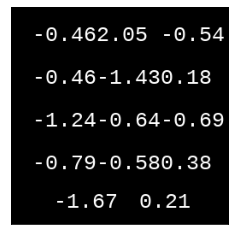

In [ ]:
plt.figure()
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(temp_set[0])

In [ ]:
cnn_train_X = imageEncode(cnn_train_X)
cnn_valid_X = imageEncode(cnn_valid_X)

In [ ]:
print(cnn_train_X.shape)
print(cnn_valid_X.shape)

(3434, 255, 255, 3)
(859, 255, 255, 3)


In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
    
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10))

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
# Re-synthesizing the datasets back together.
cnn_test = tf.data.Dataset.from_tensor_slices((cnn_train_X, cnn_train_Y))
cnn_valid = tf.data.Dataset.from_tensor_slices((cnn_valid_X, cnn_valid_Y))

In [ ]:
with tf.device('/GPU:0'):
    cnn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    cnn_model.fit(cnn_train_X, cnn_train_Y, epochs = 100, verbose = True, validation_data = (cnn_valid_X, cnn_valid_Y))

Epoch 1/100
108/108 [==============================] - 5s 45ms/step - loss: 7.6448 - accuracy: 0.4953 - val_loss: 8.2205 - val_accuracy: 0.4342
Epoch 2/100
108/108 [==============================] - 4s 38ms/step - loss: 7.6448 - accuracy: 0.4953 - val_loss: 8.2205 - val_accuracy: 0.4342
Epoch 3/100
108/108 [==============================] - 4s 38ms/step - loss: 7.6448 - accuracy: 0.4953 - val_loss: 8.2205 - val_accuracy: 0.4342
Epoch 4/100
108/108 [==============================] - 4s 38ms/step - loss: 7.6448 - accuracy: 0.4953 - val_loss: 8.2205 - val_accuracy: 0.4342
Epoch 5/100
108/108 [==============================] - 4s 38ms/step - loss: 7.6448 - accuracy: 0.4953 - val_loss: 8.2205 - val_accuracy: 0.4342
Epoch 6/100
108/108 [==============================] - 4s 38ms/step - loss: 7.6448 - accuracy: 0.4953 - val_loss: 8.2205 - val_accuracy: 0.4342
Epoch 7/100
108/108 [==============================] - 4s 38ms/step - loss: 7.6448 - accuracy: 0.4953 - val_loss: 8.2205 - val_accuracy:

In [54]:
# Evaluating the neural network
cnn_predictions = cnn_model.predict(cnn_valid_X).round()
cnn_predictions[:5]

array([[ 55.,  62.,  30.,  49.,  22., -12.,  59.,  29.,  28., -18.],
       [ 62.,  68.,  30.,  56.,  23., -11.,  59.,  31.,  31., -17.],
       [ 59.,  62.,  30.,  52.,  23., -13.,  56.,  28.,  29., -17.],
       [ 62.,  62.,  26.,  50.,  19.,  -9.,  53.,  31.,  27., -16.],
       [ 55.,  64.,  31.,  50.,  23., -12.,  60.,  28.,  30., -18.]],
      dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_score = accuracy_score(cnn_valid_X, cnn_valid_Y)
acc_score

ValueError: ignored

In [ ]:
prec_score = precision_score(nn_validation_Y, nn_predictions)
prec_score

In [ ]:
rec_score = recall_score(nn_validation_Y, nn_predictions)
rec_score

In [ ]:
f1 = f1_score(nn_validation_Y, nn_predictions)
f1